### Initial Setup

In [1]:
# !pip install imutils
# !pip install easyocr
# !pip install torch 
# !pip install torchvision
# !pip install torchaudio

In [1]:
## Module Imports

## Utilities imports
import os
import imutils

# Standard imports
import numpy as np
import pandas as pd

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# Image processing imports
import cv2
import easyocr


In [2]:
## function definition

def get_shape(img):
    """
store image shape values x_pixel,y_pixel,num_channels in respective lists
    """
    x_pixel_list.append(img.shape[0])
    y_pixel_list.append(img.shape[1])
    num_channels_list.append(img.shape[2])

### Read in image, obtain values from img.shape 

In [3]:
# Assign directory
directory = '../assets/data/clean_data'
# Instantiate empty lists
x_pixel_list = []
y_pixel_list = []
num_channels_list = []

In [4]:
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        img = cv2.imread(str(f))
        get_shape(img)

In [5]:
# Zip lists together
zippedlist = list(zip(x_pixel_list,y_pixel_list,num_channels_list))

# Store zipped lists into dataframe
df_img = pd.DataFrame(zippedlist,
                      columns = ['x_pixels','y_pixels','num_channels'])

## EDA??

In [6]:
df_img.head()
#click ... to see output below

,x_pixels,y_pixels,num_channels
0,1350,1080,3
1,1350,1080,3
2,1350,1080,3
3,1080,1080,3
4,1080,1080,3


In [7]:
df_img.head()

,x_pixels,y_pixels,num_channels
0,1350,1080,3
1,1350,1080,3
2,1350,1080,3
3,1080,1080,3
4,1080,1080,3


In [8]:
df_img.describe()
#click ... to see output below

,x_pixels,y_pixels,num_channels
count,315.000000,315.000000,315.0
mean,1250.622222,1028.866667,3.0
std,172.921598,117.472024,0.0
min,709.000000,732.000000,3.0
25%,1080.000000,1080.000000,3.0
50%,1350.000000,1080.000000,3.0
75%,1350.000000,1080.000000,3.0
max,1351.000000,1080.000000,3.0


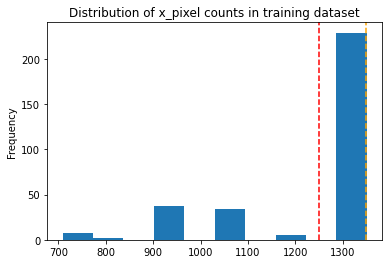

In [9]:
# plot x_pixels distribution
df_img['x_pixels'].plot(kind= 'hist', title = 'Distribution of x_pixel counts in training dataset');
plt.axvline(x= df_img['x_pixels'].mean(), color = 'red', linestyle= '--')
plt.axvline(x= df_img['x_pixels'].median(), color = 'orange', linestyle= '--');

**Observations**  
- Seemingly normal distribution with peak at ~1300 pixel counts having the highest occurence?

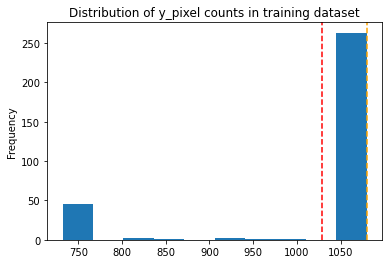

In [10]:
# plot y_pixels distribution
df_img['y_pixels'].plot(kind= 'hist', title = 'Distribution of y_pixel counts in training dataset');
plt.axvline(x= df_img['y_pixels'].mean(), color = 'red', linestyle= '--')
plt.axvline(x= df_img['y_pixels'].median(), color = 'orange', linestyle= '--')

**Observations**  
- Seemingly negatively skewed distribution with peak at ~1050 pixel counts having the highest occurence?

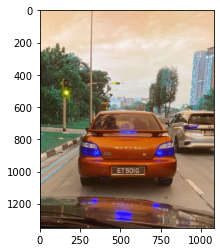

In [13]:
img = cv2.imread('../assets/data/clean_data/image1.jpg')
plt.imshow(img);

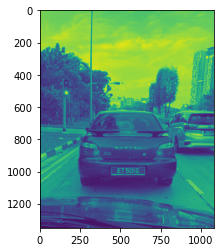

In [14]:
# Apply grayscale to image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray);

**Observations**  
- Original grayscale image has a blue-ish tint, instead of a fullly b/w image. This is probably due to OpenCV interpreting colour channels as blue, green, red as compared to the usual red, green, blue.

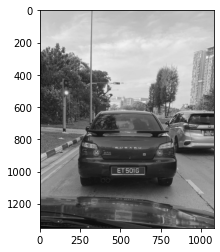

In [15]:
# Conversion from BGR2RGB returns the expected grayscale image in b/w.
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB));

## Applying filtering to remove noise

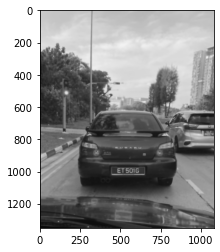

In [16]:
bfilter = cv2.bilateralFilter(gray, 11, 60, 60)# noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB));

## Applying Edge detection to the image

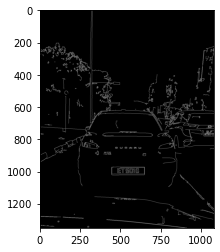

In [17]:
edged = cv2.Canny(bfilter,30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB));

## Find countours and apply mask

In [18]:
# goes through image to find shapes, returning a tree, with approximate contour with 4 points for the number plate
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [19]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [20]:
location

array([[[ 444,  975]],

       [[ 450, 1022]],

       [[ 649, 1019]],

       [[ 648,  972]]], dtype=int32)

In [21]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

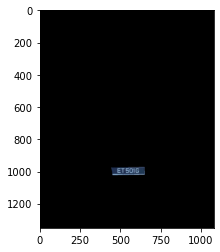

In [22]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))